## Marketing Channel Efficiency Analysis: Facebook vs. AdWords

### The Business Problem:
A marketing agency ran two parallel ad campaigns throughout 2019—one on Facebook and one on Google AdWords. They spent money on both every single day. The CMO (Chief Marketing Officer) wants to know:
- Which platform is actually performing better? 
- Where should we put our budget next year?

Our job is to answer these questions using statistical evidence, not just "looking at the chart."

# Imports and Data Loading


In [2]:
# 1. Import Standard Libraries
import pandas as pd             # For data manipulation (the dataframe)
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns           # For beautiful, easier plotting
import scipy.stats as stats     # For the statistical T-tests

In [3]:
# 2. Load the Dataset
# Ensure the csv file is in the same folder as your notebook, or provide the full path
df = pd.read_csv('marketing_campaign.csv')

# 3. View the Data
# We look at the first 5 rows to understand what we are dealing with
print("First 5 Rows of Data:")
display(df.head())

First 5 Rows of Data:


,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [4]:
# 4. Check Data Types
# This tells us if Python sees the numbers as 'integers' or 'text' (objects)
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign            

# Data Description
**Overview** This dataset compares the daily performance of two separate digital marketing campaigns—**Facebook Ads vs. Google AdWords**—run continuously throughout the year 2019. The goal is to evaluate which platform offered better efficiency (cost) and effectiveness (conversions).

**Dataset Structure**
- Time Period: Jan 1, 2019 – Dec 31, 2019 (365 Days)
- Granularity: Daily (1 row per day)
- Total Records: 365 rows

**Key Features (Columns)**
| Feature | Definition |
| :--- | :--- |
| Date | The specific day of the campaign (YYYY-MM-DD). |
| Ad Views | Impressions. The total number of times the ad was displayed to users. |
| Ad Clicks | The total number of times users clicked on the ad. |
| Ad Conversions | The number of purchases or leads resulting directly from the ad. |
| Cost per Ad | Total Daily Spend. The total amount of money spent on that platform for that day. |
| Click-Through Rate (CTR) | $\frac{\text{Clicks}}{\text{Views}}$. Measures how "catchy" the ad is. |
| Conversion Rate | $\frac{\text{Conversions}}{\text{Clicks}}$. Measures how well the landing page converts interest into sales. |
| Cost per Click (CPC) | $\frac{\text{Cost}}{\text{Clicks}}$. The average price paid for each visitor. |


# Data Cleaning

In [5]:
# 1. Clean Column Names
# We map old nasty names to clean short names
df.columns = [
    'Date', 
    'Facebook_Campaign', 'Facebook_Views', 'Facebook_Clicks', 'Facebook_Conversions', 
    'Facebook_Cost', 'Facebook_CTR', 'Facebook_Conversion_Rate', 'Facebook_CPC',
    'AdWords_Campaign', 'AdWords_Views', 'AdWords_Clicks', 'AdWords_Conversions', 
    'AdWords_Cost', 'AdWords_CTR', 'AdWords_Conversion_Rate', 'AdWords_CPC'
]

# 2. Convert 'Date' to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# 3. Clean Special Characters ($ and %)
# We define a list of columns that need specific cleaning
cols_to_clean = [
    'Facebook_Cost', 'Facebook_CTR', 'Facebook_Conversion_Rate', 'Facebook_CPC',
    'AdWords_Cost', 'AdWords_CTR', 'AdWords_Conversion_Rate', 'AdWords_CPC'
]

for col in cols_to_clean:
    # Remove '$' and '%' and convert to float
    # We use regex=False to treat them as literal characters
    df[col] = df[col].astype(str).str.replace('$', '', regex=False)
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    df[col] = df[col].astype(float)

# 4. Verify the cleaning
print("New Data Types:")
print(df.info())

New Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      365 non-null    datetime64[ns]
 1   Facebook_Campaign         365 non-null    object        
 2   Facebook_Views            365 non-null    int64         
 3   Facebook_Clicks           365 non-null    int64         
 4   Facebook_Conversions      365 non-null    int64         
 5   Facebook_Cost             365 non-null    float64       
 6   Facebook_CTR              365 non-null    float64       
 7   Facebook_Conversion_Rate  365 non-null    float64       
 8   Facebook_CPC              365 non-null    float64       
 9   AdWords_Campaign          365 non-null    object        
 10  AdWords_Views             365 non-null    int64         
 11  AdWords_Clicks            365 non-null    int64         
 12  AdWord

In [6]:
print("\nNew First 5 Rows:")
display(df.head())


New First 5 Rows:


,Date,Facebook_Campaign,Facebook_Views,Facebook_Clicks,Facebook_Conversions,Facebook_Cost,Facebook_CTR,Facebook_Conversion_Rate,Facebook_CPC,AdWords_Campaign,AdWords_Views,AdWords_Clicks,AdWords_Conversions,AdWords_Cost,AdWords_CTR,AdWords_Conversion_Rate,AdWords_CPC
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,4984,59,5,194.0,1.18,8.40,3.30
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan19,4022,71,6,75.0,1.77,7.80,1.05
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan19,3863,44,4,141.0,1.13,9.59,3.23
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan19,3911,49,5,141.0,1.26,11.08,2.86
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan19,4070,55,7,133.0,1.36,12.22,2.40


# Feature Engineering

4 critical new features that didn't exist in the raw file:
- Facebook_CPA (Cost Per Conversion): How much was paid for one sale.
- AdWords_CPA: Same for Google.
    - Why this matters: We might have cheap clicks (low CPC) but expensive sales (high CPA) if the traffic is junk. This is the truth-teller metric.
- Month: To see seasonal trends (e.g., "Is December expensive?").
- Day_Of_Week: To check daily behavior (e.g., "Do people buy on Weekends?").

In [10]:
# --- FEATURE ENGINEERING START ---

# 1. Create "Cost Per Conversion" (CPA)
# Formula: Total Cost / Total Conversions
# This tells us: "How much did we pay to get 1 sale?" (Lower is better)

# We use np.where to handle cases where Conversions might be 0 to avoid DivisionByZero errors
df['Facebook_CPA'] = np.where(df['Facebook_Conversions'] > 0, 
                              df['Facebook_Cost'] / df['Facebook_Conversions'], 
                              df['Facebook_Cost']) # If 0 conversions, the cost is just "wasted spend" or we can set to NaN. 
                                                   # Usually CPA is undefined. Let's set to Cost for now to show "high cost" or keep straightforward division.
                                                   # Better approach: Just divide. If inf, we handle it.
df['Facebook_CPA'] = df['Facebook_Cost'] / df['Facebook_Conversions']
df['AdWords_CPA'] = df['AdWords_Cost'] / df['AdWords_Conversions']


# 2. Extract Time Features
# We want to know if specific months or days are better
df['Month'] = df['Date'].dt.month_name()
df['Day_Of_Week'] = df['Date'].dt.day_name()

# 3. Verify
# Check for infinite values (days with 0 conversions)
print("Infinite CPAs (Days with 0 conversions):")
print("Facebook:", np.isinf(df['Facebook_CPA']).sum())
print("AdWords:", np.isinf(df['AdWords_CPA']).sum())

# Replace infinity with 0 or NaN for plotting safety later, or leave it? 
# For analysis, we usually drop these days or treat them separately. 
# Let's replace inf with NaN for now.
df.replace([np.inf, -np.inf], np.nan, inplace=True)

Infinite CPAs (Days with 0 conversions):
Facebook: 0
AdWords: 0


In [11]:
# Preview
print("\nNew Features Added:")
df.head()


New Features Added:


,Date,Facebook_Campaign,Facebook_Views,Facebook_Clicks,Facebook_Conversions,Facebook_Cost,Facebook_CTR,Facebook_Conversion_Rate,Facebook_CPC,AdWords_Campaign,...,AdWords_Clicks,AdWords_Conversions,AdWords_Cost,AdWords_CTR,AdWords_Conversion_Rate,AdWords_CPC,Facebook_CPA,AdWords_CPA,Month,Day_Of_Week
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,...,59,5,194.0,1.18,8.40,3.30,15.750000,38.80,January,Tuesday
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan19,...,71,6,75.0,1.77,7.80,1.05,8.666667,12.50,January,Wednesday
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan19,...,44,4,141.0,1.13,9.59,3.23,12.750000,35.25,January,Thursday
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan19,...,49,5,141.0,1.26,11.08,2.86,7.888889,28.20,January,Friday
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan19,...,55,7,133.0,1.36,12.22,2.40,11.142857,19.00,January,Saturday


# Exploratory Data Analysis

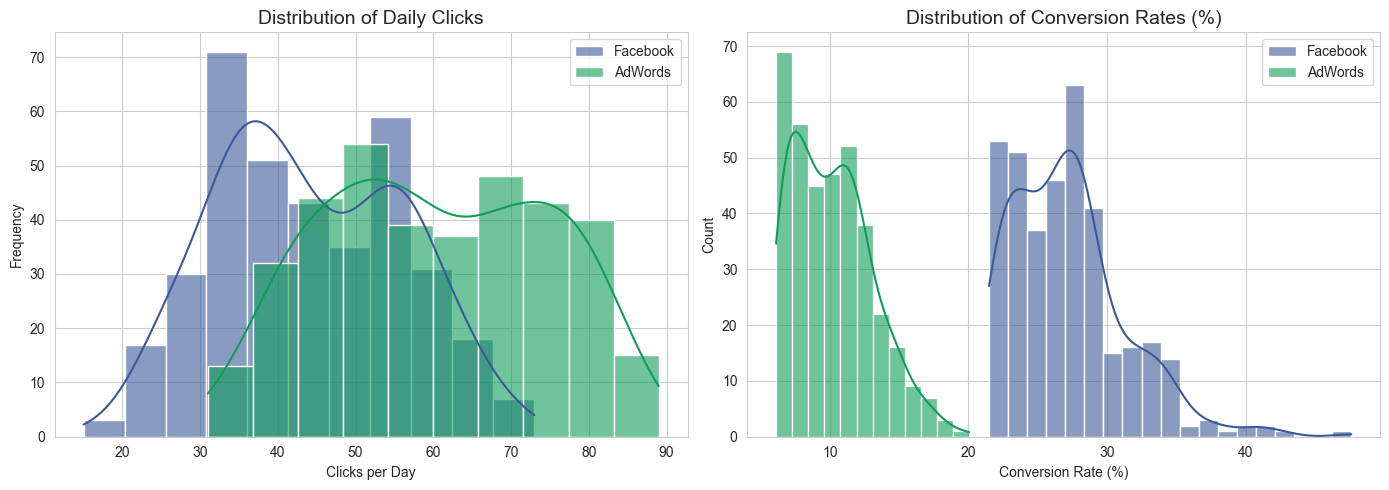

In [12]:
# Set the visual style
sns.set_style("whitegrid")

# --- Plot 1: Distribution of Clicks (Histogram) ---
# Purpose: Check if one platform consistently drives more traffic or if it varies.
plt.figure(figsize=(14, 5))

# Subplot 1: Clicks Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Facebook_Clicks'], color='#3b5998', label='Facebook', kde=True, alpha=0.6)
sns.histplot(df['AdWords_Clicks'], color='#0F9D58', label='AdWords', kde=True, alpha=0.6)
plt.title('Distribution of Daily Clicks', fontsize=14)
plt.xlabel('Clicks per Day')
plt.ylabel('Frequency')
plt.legend()

# Subplot 2: Conversion Rate Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Facebook_Conversion_Rate'], color='#3b5998', label='Facebook', kde=True, alpha=0.6)
sns.histplot(df['AdWords_Conversion_Rate'], color='#0F9D58', label='AdWords', kde=True, alpha=0.6)
plt.title('Distribution of Conversion Rates (%)', fontsize=14)
plt.xlabel('Conversion Rate (%)')
plt.legend()

plt.tight_layout()
plt.show()


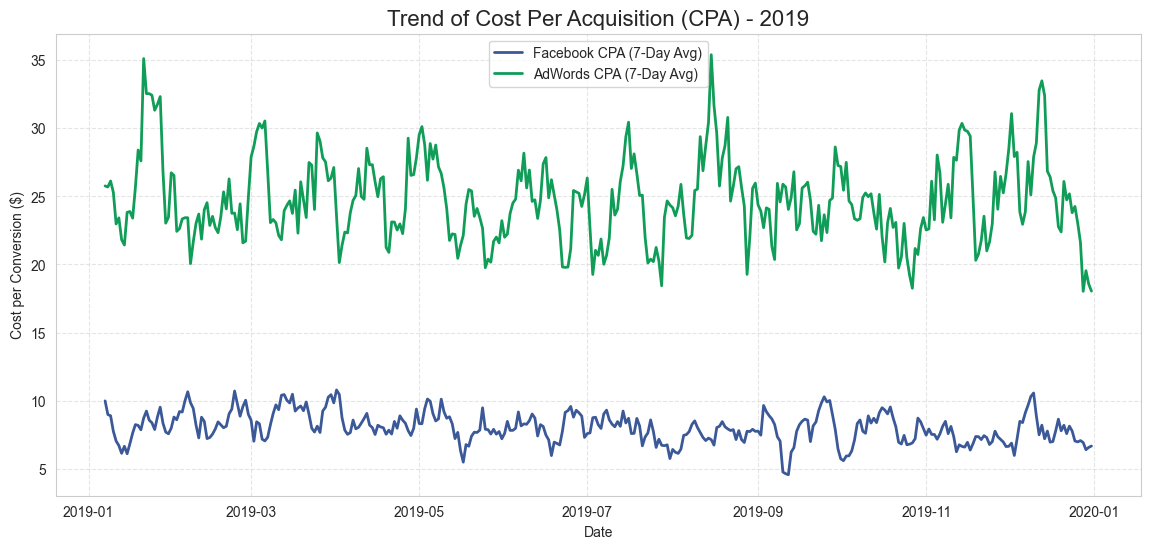

In [13]:
# --- Plot 2: Time Series of Efficiency (CPA) ---
# Purpose: See if costs are stable or increasing over time.
plt.figure(figsize=(14, 6))

# We use a rolling mean (7-day window) to smooth out daily noise and see the trend better
plt.plot(df['Date'], df['Facebook_CPA'].rolling(window=7).mean(), label='Facebook CPA (7-Day Avg)', color='#3b5998', linewidth=2)
plt.plot(df['Date'], df['AdWords_CPA'].rolling(window=7).mean(), label='AdWords CPA (7-Day Avg)', color='#0F9D58', linewidth=2)

plt.title('Trend of Cost Per Acquisition (CPA) - 2019', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Cost per Conversion ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

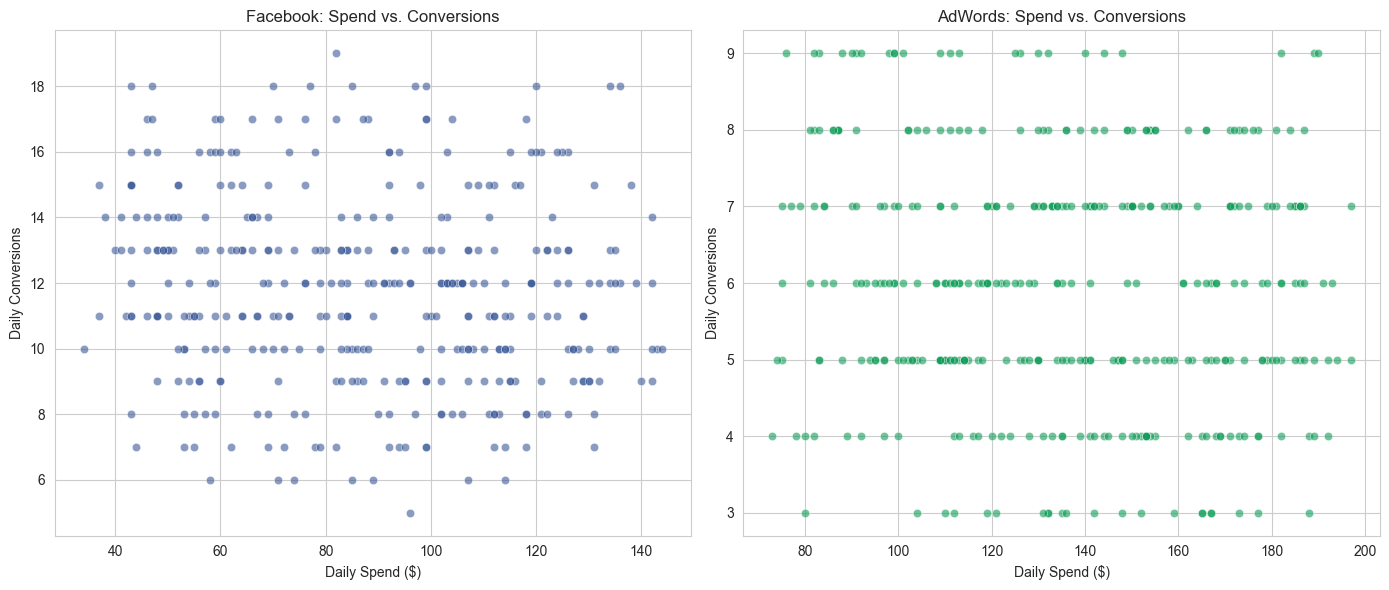

In [14]:
# --- Plot 3: Correlation (Scatter Plot) ---
# Purpose: Does spending more money actually guarantee more conversions?
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Facebook_Cost', y='Facebook_Conversions', data=df, color='#3b5998', alpha=0.6)
plt.title('Facebook: Spend vs. Conversions')
plt.xlabel('Daily Spend ($)')
plt.ylabel('Daily Conversions')

plt.subplot(1, 2, 2)
sns.scatterplot(x='AdWords_Cost', y='AdWords_Conversions', data=df, color='#0F9D58', alpha=0.6)
plt.title('AdWords: Spend vs. Conversions')
plt.xlabel('Daily Spend ($)')
plt.ylabel('Daily Conversions')

plt.tight_layout()
plt.show()

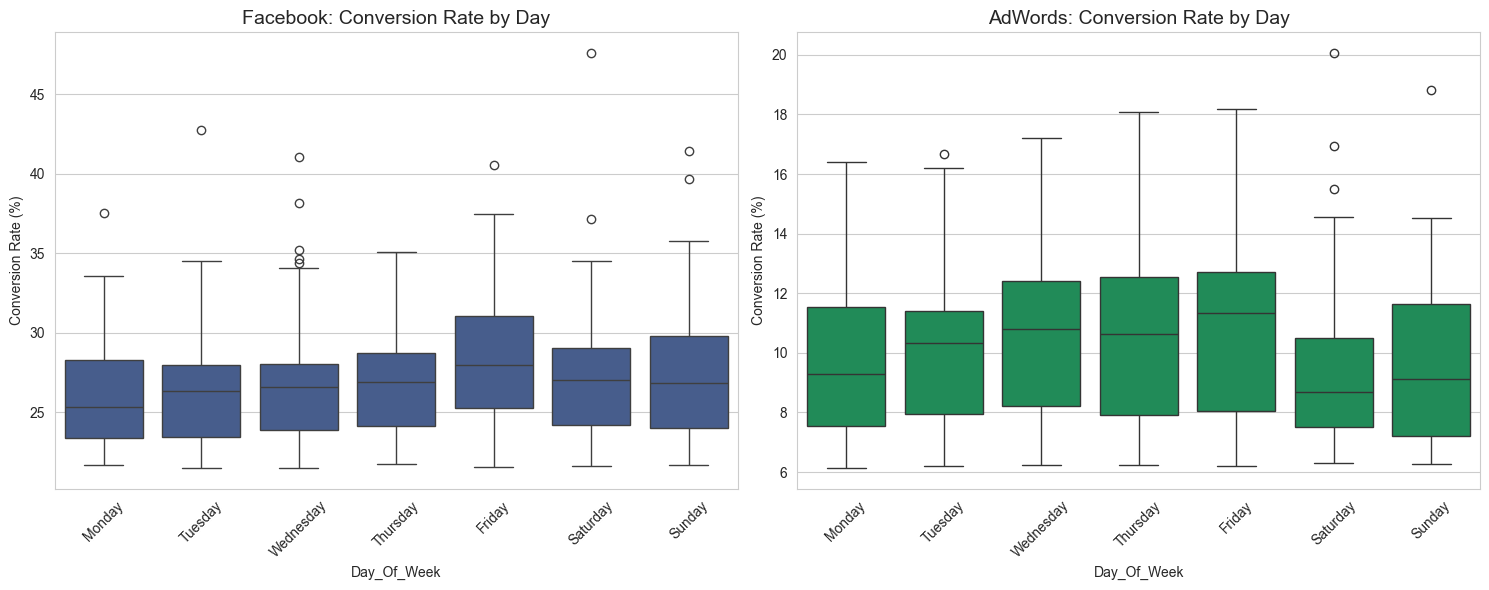

In [17]:
# 4. Day of Week Analysis (Boxplots)
# Purpose: Check if specific days (e.g., Weekends) perform better on certain platforms.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Day_Of_Week', y='Facebook_Conversion_Rate', data=df, order=days_order, color='#3b5998')
plt.title('Facebook: Conversion Rate by Day', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate (%)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Day_Of_Week', y='AdWords_Conversion_Rate', data=df, order=days_order, color='#0F9D58')
plt.title('AdWords: Conversion Rate by Day', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate (%)')

plt.tight_layout()
plt.show()

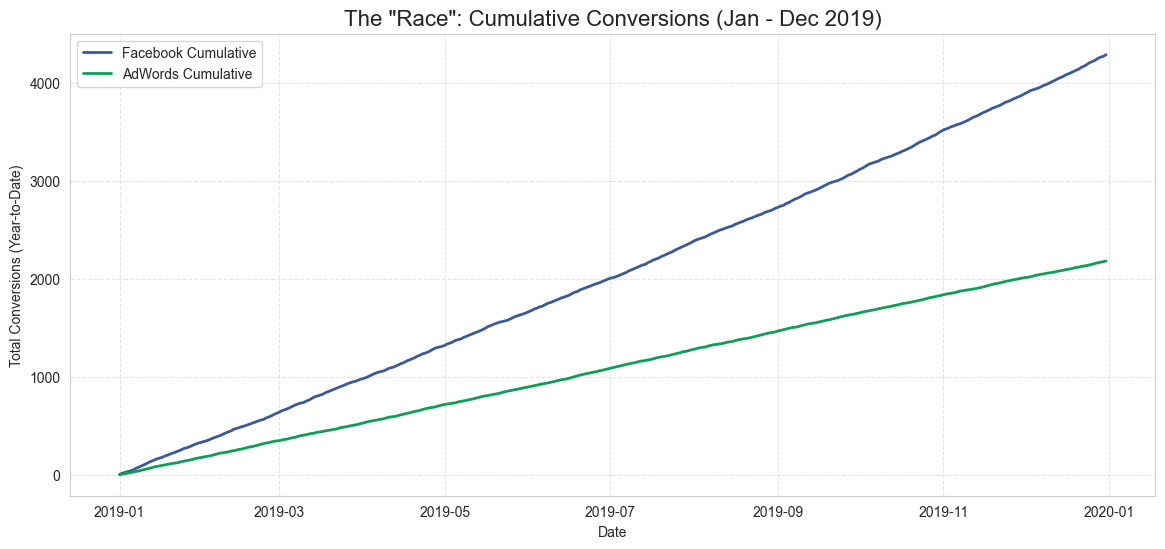

In [18]:
# 5. The "Race" Chart (Cumulative Conversions)
# Purpose: Who generated the most total value over the year?
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Facebook_Conversions'].cumsum(), label='Facebook Cumulative', color='#3b5998', linewidth=2)
plt.plot(df['Date'], df['AdWords_Conversions'].cumsum(), label='AdWords Cumulative', color='#0F9D58', linewidth=2)

plt.title('The "Race": Cumulative Conversions (Jan - Dec 2019)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Conversions (Year-to-Date)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

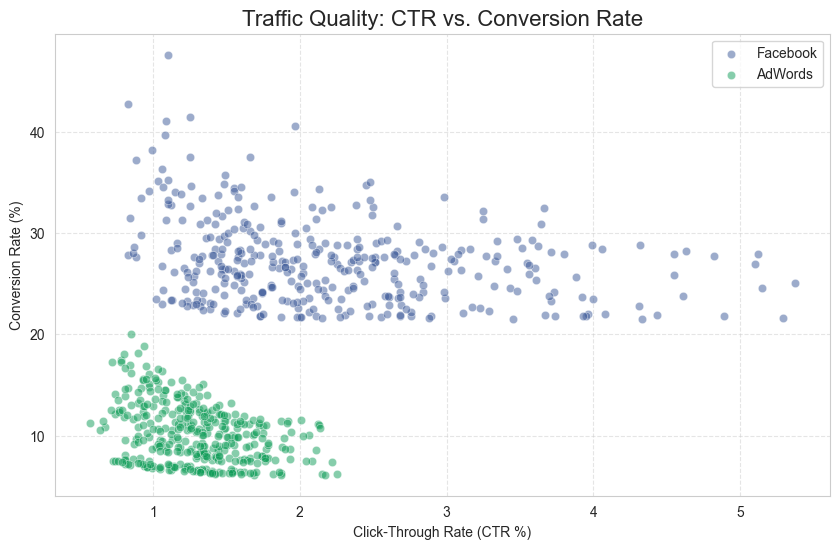

In [19]:
# 6. Quality vs. Quantity (CTR vs. Conversion Rate)
# Purpose: Identify "Empty Calories" (High CTR but Low Conversions)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Facebook_CTR', y='Facebook_Conversion_Rate', data=df, color='#3b5998', alpha=0.5, label='Facebook')
sns.scatterplot(x='AdWords_CTR', y='AdWords_Conversion_Rate', data=df, color='#0F9D58', alpha=0.5, label='AdWords')

plt.title('Traffic Quality: CTR vs. Conversion Rate', fontsize=16)
plt.xlabel('Click-Through Rate (CTR %)')
plt.ylabel('Conversion Rate (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\tinot\AppData\Local\Temp\ipykernel_12492\3441089658.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Facebook', 'AdWords'])
C:\Users\tinot\AppData\Local\Temp\ipykernel_12492\3441089658.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Facebook', 'AdWords'])
C:\Users\tinot\AppData\Local\Temp\ipykernel_12492\3441089658.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Conversion Rate', data=melted_conv, ax=axes[1, 0], palette=['#3b5998', '#0F9D58'])
C:\Users\tinot\AppData\Local\Temp\ipykernel_12492\3441089658.py:24: UserWarning: set_ticklabels() should only be used with a fixed numb

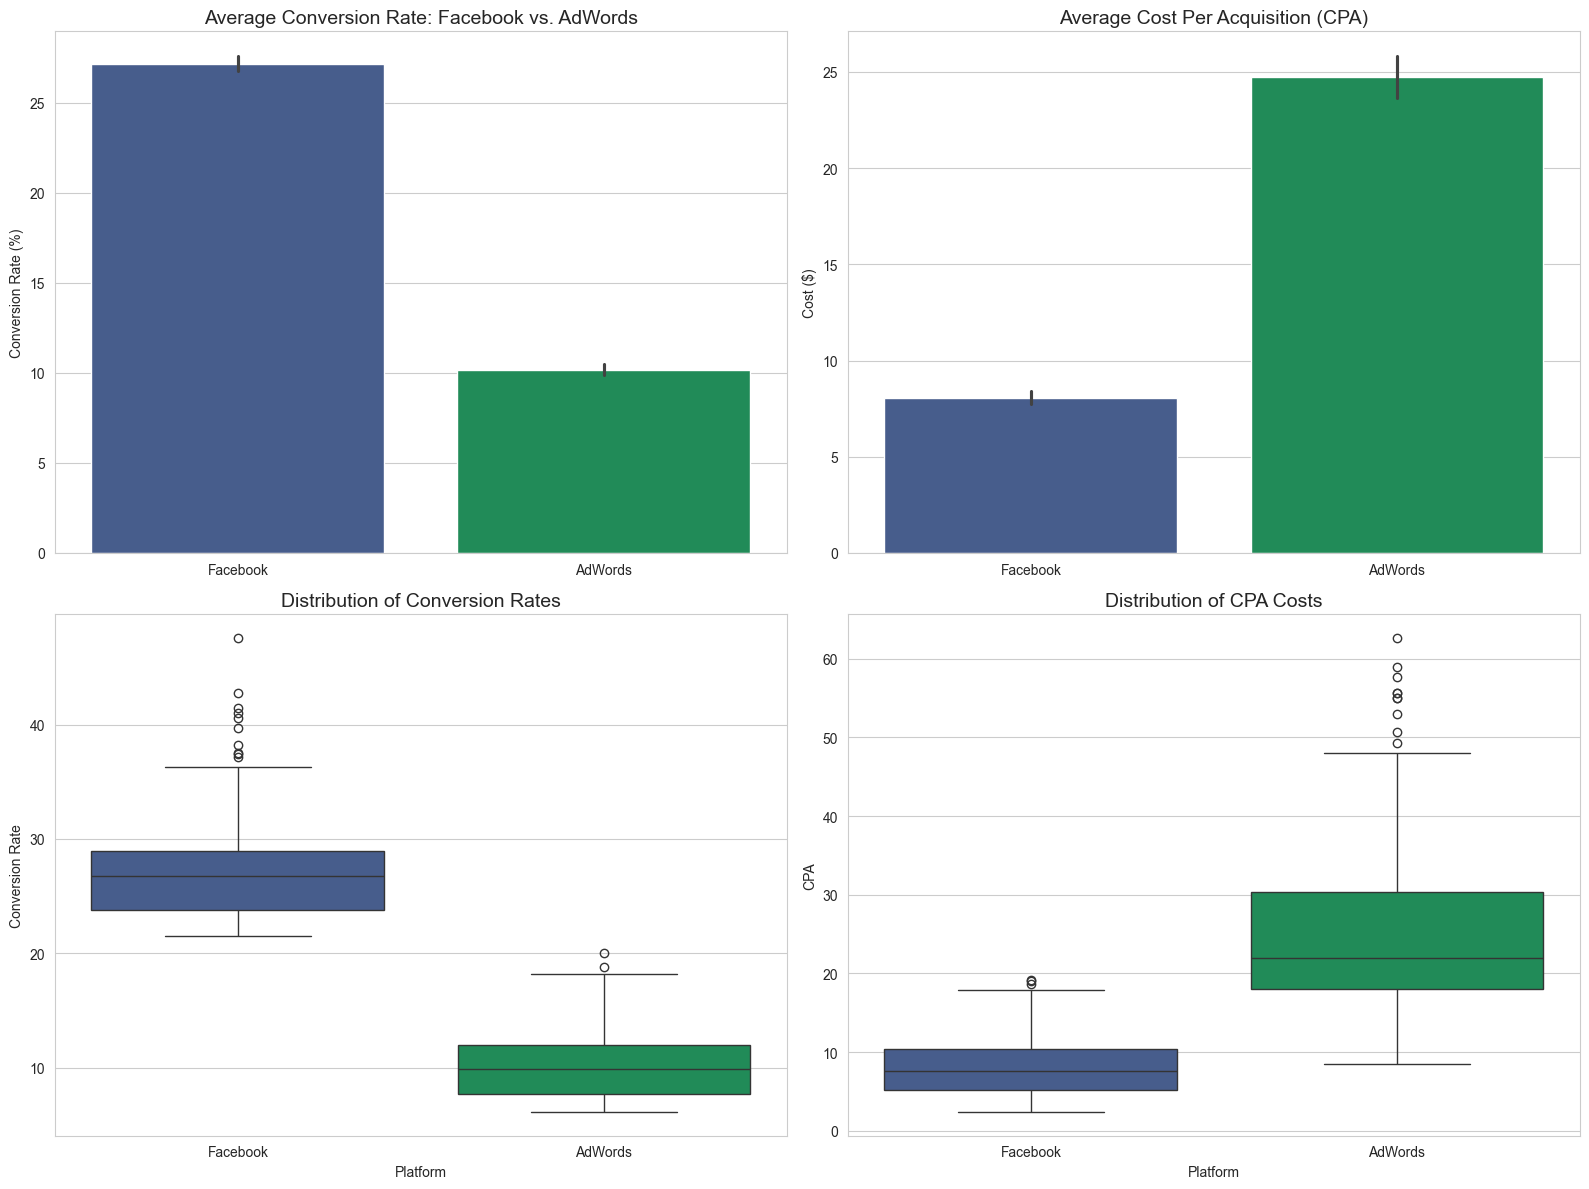

In [21]:
# --- Visualization Code ---
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Average Conversion Rate Comparison
# Using barplot automatically calculates mean and shows error bars (95% CI)
sns.barplot(data=df[['Facebook_Conversion_Rate', 'AdWords_Conversion_Rate']], ax=axes[0, 0], palette=['#3b5998', '#0F9D58'])
axes[0, 0].set_title('Average Conversion Rate: Facebook vs. AdWords', fontsize=14)
axes[0, 0].set_ylabel('Conversion Rate (%)')
axes[0, 0].set_xticklabels(['Facebook', 'AdWords'])

# Chart 2: Average CPA Comparison
sns.barplot(data=df[['Facebook_CPA', 'AdWords_CPA']], ax=axes[0, 1], palette=['#3b5998', '#0F9D58'])
axes[0, 1].set_title('Average Cost Per Acquisition (CPA)', fontsize=14)
axes[0, 1].set_ylabel('Cost ($)')
axes[0, 1].set_xticklabels(['Facebook', 'AdWords'])

# Chart 3: Distribution of Conversion Rates (Box Plot)
# To plot side-by-side boxplots easily with seaborn, we can melt the dataframe
melted_conv = df.melt(value_vars=['Facebook_Conversion_Rate', 'AdWords_Conversion_Rate'], var_name='Platform', value_name='Conversion Rate')
sns.boxplot(x='Platform', y='Conversion Rate', data=melted_conv, ax=axes[1, 0], palette=['#3b5998', '#0F9D58'])
axes[1, 0].set_title('Distribution of Conversion Rates', fontsize=14)
axes[1, 0].set_xticklabels(['Facebook', 'AdWords'])

# Chart 4: Distribution of CPA (Box Plot)
melted_cpa = df.melt(value_vars=['Facebook_CPA', 'AdWords_CPA'], var_name='Platform', value_name='CPA')
sns.boxplot(x='Platform', y='CPA', data=melted_cpa, ax=axes[1, 1], palette=['#3b5998', '#0F9D58'])
axes[1, 1].set_title('Distribution of CPA Costs', fontsize=14)
axes[1, 1].set_xticklabels(['Facebook', 'AdWords'])

plt.tight_layout()
plt.show()

# 🧪 Hypothesis Testing: Facebook vs. AdWords

**The Statistical Approach**
Unlike traditional A/B tests where users are randomly split into two distinct groups (Independent Samples), this dataset represents **Time-Series Data**. The performance of Facebook and AdWords is recorded on the **same days** (Jan 1st, Jan 2nd, etc.).

**Why T-Test?**
**Why?** We are comparing the means of two related groups to determine if there is a statistically significant difference in their daily performance.
On Jan 1st, we spent money on Facebook. On Jan 1st, we also spent money on AdWords.
- These are Dependent (Paired) observations.
- If it was a holiday (e.g., Christmas), both platforms probably got more clicks. The external factors affect both equally. Because the market conditions (weekends, holidays, seasonality) affect both platforms simultaneously, these samples are **Paired (Dependent)**.
- If we treated them as independent, we would lose this critical context.

**The Solution: The Paired Sample T-Test**
We aren't just comparing "Average Facebook" vs. "Average AdWords." We are comparing the daily difference.
- $Difference_1 = (FB_{Jan1} - AW_{Jan1})$
- $Difference_2 = (FB_{Jan2} - AW_{Jan2})$
- ...
- $Difference_{365} = (FB_{Dec31} - AW_{Dec31})$

We test if the average of these differences is significantly different from 0.

### The Hypotheses
We will test two key metrics: **Conversion Rate** and **Cost Per Acquisition (CPA)**.

**1. Conversion Rate**
* $H_0$ (Null): There is no difference in the daily Conversion Rate between Facebook and AdWords ($\mu_{diff} = 0$).
* $H_1$ (Alternative): There is a significant difference ($\mu_{diff} \neq 0$).

**2. Cost Per Acquisition (CPA)**
* $H_0$ (Null): There is no difference in the daily CPA between Facebook and AdWords.
* $H_1$ (Alternative): There is a significant difference.

### Significance Level
* $\alpha = 0.05$ (We accept a 5% risk of a False Positive).


In [20]:
# --- Hypothesis Testing (Paired T-Test) ---

# 1. Prepare the Data
# We drop any NaN values to ensure the test is valid (though our cleaning should have caught them)
# We need two arrays of the same length for a paired test.
valid_data = df.dropna(subset=['Facebook_Conversion_Rate', 'AdWords_Conversion_Rate', 'Facebook_CPA', 'AdWords_CPA'])

# --- TEST 1: Conversion Rate (Effectiveness) ---
# H0: Mean difference = 0
# H1: Mean difference != 0
t_stat_conv, p_val_conv = stats.ttest_rel(valid_data['Facebook_Conversion_Rate'], valid_data['AdWords_Conversion_Rate'])

# --- TEST 2: Cost Per Acquisition (Efficiency) ---
# H0: Mean difference = 0
# H1: Mean difference != 0
t_stat_cpa, p_val_cpa = stats.ttest_rel(valid_data['Facebook_CPA'], valid_data['AdWords_CPA'])

# --- Output the Results ---
print(f"--- Test 1: Conversion Rate (Effectiveness) ---")
print(f"T-Statistic: {t_stat_conv:.4f}")
print(f"P-Value:     {p_val_conv:.4e}") # .4e is scientific notation because the number might be tiny
if p_val_conv < 0.05:
    print("RESULT: REJECT Null Hypothesis. There is a significant difference.")
else:
    print("RESULT: FAIL TO REJECT. No significant difference.")

print(f"\n--- Test 2: Cost Per Acquisition (Efficiency) ---")
print(f"T-Statistic: {t_stat_cpa:.4f}")
print(f"P-Value:     {p_val_cpa:.4e}")
if p_val_cpa < 0.05:
    print("RESULT: REJECT Null Hypothesis. There is a significant difference.")
else:
    print("RESULT: FAIL TO REJECT. No significant difference.")

# --- Calculate the Means to see WHO won ---
print("\n--- The Averages ---")
print(f"Avg Facebook Conv Rate: {valid_data['Facebook_Conversion_Rate'].mean():.2f}%")
print(f"Avg AdWords Conv Rate:  {valid_data['AdWords_Conversion_Rate'].mean():.2f}%")
print(f"Avg Facebook CPA:       ${valid_data['Facebook_CPA'].mean():.2f}")
print(f"Avg AdWords CPA:        ${valid_data['AdWords_CPA'].mean():.2f}")

--- Test 1: Conversion Rate (Effectiveness) ---
T-Statistic: 65.9766
P-Value:     1.4228e-204
RESULT: REJECT Null Hypothesis. There is a significant difference.

--- Test 2: Cost Per Acquisition (Efficiency) ---
T-Statistic: -29.1384
P-Value:     3.5713e-97
RESULT: REJECT Null Hypothesis. There is a significant difference.

--- The Averages ---
Avg Facebook Conv Rate: 27.15%
Avg AdWords Conv Rate:  10.18%
Avg Facebook CPA:       $8.07
Avg AdWords CPA:        $24.71


# 💡 Business Recommendation

## The Verdict: Facebook is the Clear Winner

Our hypothesis testing revealed statistically significant differences ($p < 0.05$) across both key metrics, with Facebook outperforming AdWords in both efficiency and effectiveness.

### 1. Effectiveness (Conversion Rate)
* **Result:** Facebook has a significantly **higher** conversion rate (T-Stat: 65.98).
* **Implication:** Traffic from Facebook is much more likely to purchase than traffic from AdWords.

### 2. Efficiency (CPA)
* **Result:** Facebook has a significantly **lower** Cost Per Acquisition (T-Stat: -29.14).
* **Implication:** It is cheaper to acquire a customer on Facebook than on AdWords.

### Strategic Action Plan
1.  **Reallocate Budget:** Shift a significant portion of the AdWords budget into Facebook campaigns immediately. Facebook is currently generating sales at a lower cost and higher volume.
2.  **Audit AdWords:** Since AdWords is more expensive and converts less, the keyword targeting might be too broad or the landing page might not be relevant to search intent. Pause high-CPA keywords.
3.  **Scale Facebook:** Since efficiency (CPA) is low, there is room to increase spend on Facebook without destroying profitability.